<a href="https://colab.research.google.com/github/sahil-37/Corporate-Credit-Risk-Modelling/blob/main/Credit_Risk_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get NASDAQ Companies

In [8]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
api_key='mLuSvX0XvbgpcKxGN5icTZFQY7uYwTOI'
url = "https://financialmodelingprep.com/api/v3/nasdaq_constituent"
headers = {
    'apikey': api_key
}

response = requests.get(url, params=headers)

data = response.json()


In [ ]:
data

Convert to NASDAQ Dataframe


In [9]:
data_sym = pd.DataFrame(data)

symbol_nasdaq = data_sym['symbol'].sample(60, random_state = 42)
all_symbols = list(symbol_nasdaq.values)

ValueError: If using all scalar values, you must pass an index

In [3]:
data_sym['symbol'].nunique()

101

Income Statement

In [4]:
income_statement = pd.DataFrame([])
for comp in all_symbols:
    url = f"https://financialmodelingprep.com/api/v3/income-statement/{comp}?period=annual"
    headers = {
        'apikey': api_key,
    }

    response = requests.get(url, params=headers)

    inc = response.json()
    inc = pd.DataFrame(inc)
    income_statement = pd.concat([income_statement, inc])

Balance Sheet

In [5]:
balance_sheet = pd.DataFrame([])
for comp in all_symbols:
    url = f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{comp}?period=annual"
    headers = {
        'apikey': api_key,
    }

    response = requests.get(url, params=headers)

    bsh = response.json()
    bsh = pd.DataFrame(bsh)
    balance_sheet = pd.concat([balance_sheet, bsh])

Cashflow Statement

In [7]:
cash_flow = pd.DataFrame([])
for comp in all_symbols:
    url = f"https://financialmodelingprep.com/api/v3/cash-flow-statement/{comp}?period=annual"
    headers = {
        'apikey': api_key,
    }

    response = requests.get(url, params=headers)

    csf = response.json()
    csf = pd.DataFrame(csf)
    cash_flow = pd.concat([cash_flow, csf])

ValueError: If using all scalar values, you must pass an index

Merging all the data to form finacial metrics for NASDAQ Companies

In [ ]:
financial_data = pd.merge(pd.merge(income_statement, balance_sheet, on = ['calendarYear', 'symbol'], suffixes = ('_inc', '_bsh')), cash_flow, on = ['calendarYear', 'symbol'], suffixes = ('_incbsh', '_csf'))


In [ ]:
income_statement.head()

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
0,2024-02-03,ROST,USD,0000745732,2024-04-02,2024-04-01 17:40:06,2023,FY,20376941000,14801601000,...,0.121303,597261000,1874520000,0.091992,5.59,5.56,335187000,337433000,https://www.sec.gov/Archives/edgar/data/745732...,https://www.sec.gov/Archives/edgar/data/745732...
1,2023-01-28,ROST,USD,0000745732,2023-03-28,2023-03-27 17:46:00,2022,FY,18695829000,13946230000,...,0.106307,475448000,1512041000,0.080876,4.40,4.38,343452000,345222000,https://www.sec.gov/Archives/edgar/data/745732...,https://www.sec.gov/Archives/edgar/data/745732...
2,2022-01-29,ROST,USD,0000745732,2022-03-29,2022-03-28 17:52:31,2021,FY,18916244000,13708907000,...,0.119397,535951000,1722589000,0.091064,4.90,4.87,351496000,353734000,https://www.sec.gov/Archives/edgar/data/745732...,https://www.sec.gov/Archives/edgar/data/745732...
3,2021-01-30,ROST,USD,0000745732,2021-03-30,2021-03-29 18:05:12,2020,FY,12531565000,9838574000,...,0.008482,20915000,85382000,0.006813,0.24,0.24,352392000,354619000,https://www.sec.gov/Archives/edgar/data/745732...,https://www.sec.gov/Archives/edgar/data/745732...
4,2020-02-01,ROST,USD,0000745732,2020-03-31,2020-03-30 17:56:18,2019,FY,16039073000,11536187000,...,0.134938,503360000,1660928000,0.103555,4.63,4.60,358462000,361182000,https://www.sec.gov/Archives/edgar/data/745732...,https://www.sec.gov/Archives/edgar/data/745732...


In [ ]:
balance_sheet.head()

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,cashAndCashEquivalents,shortTermInvestments,...,totalStockholdersEquity,totalEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,link,finalLink
0,2024-02-03,ROST,USD,0000745732,2024-04-02,2024-04-01 17:40:06,2023,FY,4886935000,0,...,4871326000,4871326000,14300109000,0,14300109000,48506000,5747704000,860769000,https://www.sec.gov/Archives/edgar/data/745732...,https://www.sec.gov/Archives/edgar/data/745732...
1,2023-01-28,ROST,USD,0000745732,2023-03-28,2023-03-27 17:46:00,2022,FY,4551876000,0,...,4288583000,4288583000,13416463000,0,13416463000,47688000,5706447000,1154571000,https://www.sec.gov/Archives/edgar/data/745732...,https://www.sec.gov/Archives/edgar/data/745732...
2,2022-01-29,ROST,USD,0000745732,2022-03-29,2022-03-28 17:52:31,2021,FY,4922365000,0,...,4060050000,4060050000,13640256000,0,13640256000,48614000,5622139000,699774000,https://www.sec.gov/Archives/edgar/data/745732...,https://www.sec.gov/Archives/edgar/data/745732...
3,2021-01-30,ROST,USD,0000745732,2021-03-30,2021-03-29 18:05:12,2020,FY,4819293000,0,...,3290640000,3290640000,12717867000,0,12717867000,48773000,5732799000,913506000,https://www.sec.gov/Archives/edgar/data/745732...,https://www.sec.gov/Archives/edgar/data/745732...
4,2020-02-01,ROST,USD,0000745732,2020-03-31,2020-03-30 17:56:18,2019,FY,1351205000,0,...,3359249000,3359249000,9348367000,0,9348367000,49978000,3487900000,2136695000,https://www.sec.gov/Archives/edgar/data/745732...,https://www.sec.gov/Archives/edgar/data/745732...


In [ ]:
financial_data[financial_data.select_dtypes('number').columns] = financial_data.select_dtypes('number') + 1


In [ ]:
financial_data.select_dtypes('number').columns

Index(['revenue', 'costOfRevenue', 'grossProfit', 'grossProfitRatio',
       'researchAndDevelopmentExpenses', 'generalAndAdministrativeExpenses',
       'sellingAndMarketingExpenses',
       'sellingGeneralAndAdministrativeExpenses', 'otherExpenses',
       'operatingExpenses',
       ...
       'dividendsPaid', 'otherFinancingActivites',
       'netCashUsedProvidedByFinancingActivities',
       'effectOfForexChangesOnCash', 'netChangeInCash', 'cashAtEndOfPeriod',
       'cashAtBeginningOfPeriod', 'operatingCashFlow', 'capitalExpenditure',
       'freeCashFlow'],
      dtype='object', length=102)

Financial Ratios

In [ ]:

financial_data['current_ratio'] = financial_data["totalCurrentAssets"] / financial_data["totalCurrentLiabilities"]
financial_data['debt_to_equity_ratio'] = financial_data["totalLiabilities"] / financial_data["totalStockholdersEquity"]
financial_data['gross_profit_margin'] = financial_data["grossProfit"] / financial_data["revenue"]
financial_data['operating_margin'] = financial_data["operatingIncome"] / financial_data["revenue"]
financial_data['return_on_assets'] = financial_data["netIncome_csf"] / financial_data["totalAssets"]
financial_data['operating_cash_flow_to_sales_ratio'] = financial_data['netCashUsedProvidedByFinancingActivities'] / financial_data["revenue"]
financial_data['free_cash_flow_to_net_income_ratio'] = financial_data['freeCashFlow'] / financial_data["netIncome_csf"]
financial_data['debt_coverage_ratio'] = financial_data['freeCashFlow'] / financial_data['totalDebt']

<ipython-input-24-3047f924b527>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  financial_data['current_ratio'] = financial_data["totalCurrentAssets"] / financial_data["totalCurrentLiabilities"]
<ipython-input-24-3047f924b527>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  financial_data['debt_to_equity_ratio'] = financial_data["totalLiabilities"] / financial_data["totalStockholdersEquity"]
<ipython-input-24-3047f924b527>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

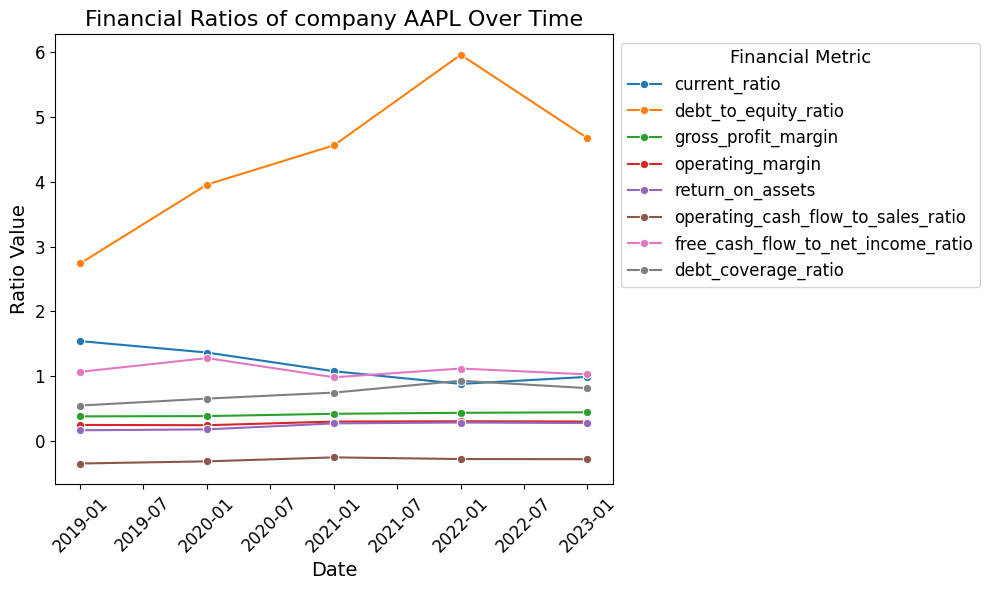

In [ ]:
financial_cols = ['calendarYear', 'current_ratio', 'debt_to_equity_ratio', 'gross_profit_margin','operating_margin' , 'return_on_assets', 'operating_cash_flow_to_sales_ratio',
                 'free_cash_flow_to_net_income_ratio', 'debt_coverage_ratio']

data = financial_data[financial_data['symbol'] == 'AAPL'][financial_cols]
df_long = pd.melt(data, id_vars=['calendarYear'], var_name='Metric', value_name='Value')

df_long['calendarYear'] = pd.to_datetime(df_long['calendarYear'])


plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='calendarYear', y='Value', hue='Metric', marker='o')

plt.title('Financial Ratios of company AAPL Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Ratio Value', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate the x-axis labels for readability
plt.yticks(fontsize=12)

plt.legend(title='Financial Metric', fontsize=12, title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

ratio_cols = ['current_ratio', 'debt_to_equity_ratio', 'gross_profit_margin','operating_margin' , 'return_on_assets', 'operating_cash_flow_to_sales_ratio',
                 'free_cash_flow_to_net_income_ratio', 'debt_coverage_ratio']

X = financial_data[financial_data['calendarYear'] == '2023'][ratio_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(X_scaled)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
X_2022['Cluster'] = kmeans.fit_predict(X_scaled)

X_2022['Cluster'].value_counts()

In [ ]:
ratio_cols.append('Cluster')

# Calculate mean values for each cluster
cluster_means = X_2022[ratio_cols].groupby('Cluster').mean()

In [ ]:
ratio_cols = ['current_ratio', 'debt_to_equity_ratio', 'gross_profit_margin','operating_margin' , 'return_on_assets', 'operating_cash_flow_to_sales_ratio',
                 'free_cash_flow_to_net_income_ratio', 'debt_coverage_ratio']
for i in ratio_cols:
    # Lower score is better
    if i == 'debt_to_equity_ratio':
        cluster_means[f'{i}_rank'] = cluster_means[i].rank(method='average', ascending=True)
    else:
        #Higher score is better
        cluster_means[f'{i}_rank'] = cluster_means[i].rank(method='average', ascending=False)


In [ ]:
cluster_means[ratio_rank_cols].mean(axis = 1).sort_values()


In [ ]:
ratio_cols = ['symbol','current_ratio', 'debt_to_equity_ratio', 'gross_profit_margin','operating_margin' , 'return_on_assets', 'operating_cash_flow_to_sales_ratio',
                 'free_cash_flow_to_net_income_ratio', 'debt_coverage_ratio']

annual_means = financial_data[ratio_cols].groupby('symbol').mean()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

scaler = StandardScaler()
X_scaled = scaler.fit_transform(annual_means)

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(X_scaled)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
annual_means['Cluster'] = kmeans.fit_predict(X_scaled)
annual_means['Cluster'].value_counts()

In [ ]:
ratio_cols = ['Cluster','current_ratio', 'debt_to_equity_ratio', 'gross_profit_margin','operating_margin' , 'return_on_assets', 'operating_cash_flow_to_sales_ratio',
                 'free_cash_flow_to_net_income_ratio', 'debt_coverage_ratio']
ann_cluster_means = annual_means[ratio_cols].groupby('Cluster').mean()
ann_cluster_means

In [ ]:
ratio_cols = ['current_ratio', 'debt_to_equity_ratio', 'gross_profit_margin','operating_margin' , 'return_on_assets', 'operating_cash_flow_to_sales_ratio',
                 'free_cash_flow_to_net_income_ratio', 'debt_coverage_ratio']
for i in ratio_cols:
    # Lower score is better
    if i == 'debt_to_equity_ratio':
       ann_cluster_means[f'{i}_rank'] = cluster_means[i].rank(method='average', ascending=True)
    else:
        #Higher score is better
        ann_cluster_means[f'{i}_rank'] = cluster_means[i].rank(method='average', ascending=False)

ann_cluster_means[ratio_rank_cols].mean(axis = 1).sort_values()